In [6]:
#Week 2
# 1.a - Import the data and create two new columns.
# Create one column that is the number of years since 1790.
# Create another column that is the population in millions

import pandas as pd
df = pd.read_csv("C:\\Users\\vampr\\Desktop\\US_Pop_Data.csv")

# years since 1790
df['Years since 1790'] = df['year'] - 1790

# population in millions
df['Population in Million'] = df['us_pop'] / 1000000

# check columns
print(df.head())

   year    us_pop  Years since 1790  Population in Million
0  1790   3929326                 0               3.929326
1  1800   5308483                10               5.308483
2  1810   7239881                20               7.239881
3  1820   9638453                30               9.638453
4  1830  12866020                40              12.866020


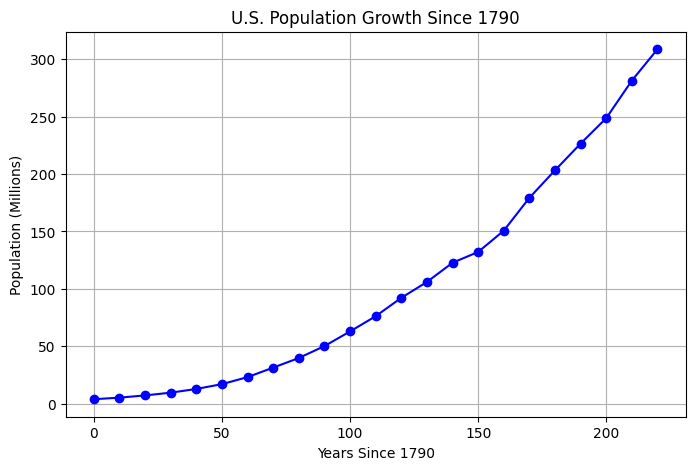

In [7]:
# 1.b - Plot the US population (in millions) vs the year since 1790
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(df["Years since 1790"], df["Population in Million"], marker="o", linestyle="-", color="b")

# Add labels and title
plt.xlabel("Years Since 1790")
plt.ylabel("Population (Millions)")
plt.title("U.S. Population Growth Since 1790")

# Show the plot
plt.grid(True)  # add gridlines
plt.show()

R² Value: 0.9192


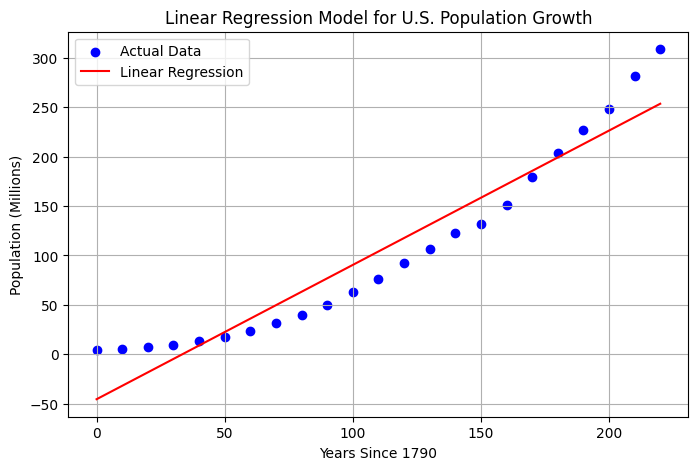

In [8]:
# 1.c - Create a linear regression model to predict the US population (in millions) t years from 1790. 
# Find and report the R2-value of this model. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv(r"C:\Users\vampr\Desktop\US_Pop_Data.csv")

# column names
df["Years since 1790"] = df["year"] - 1790
df["Population in Million"] = df["us_pop"] / 1_000_000

# prep data for regression
X = df[["Years since 1790"]]  # t years since 1790
y = df["Population in Million"]  # population in millions

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Calculate R² value
r2 = r2_score(y, y_pred)
print(f"R² Value: {r2:.4f}")

# Plot 
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Actual Data")  # Scatter plot of actual data
plt.plot(X, y_pred, color="red", label="Linear Regression")  # Regression line
plt.xlabel("Years Since 1790")
plt.ylabel("Population (Millions)")
plt.title("Linear Regression Model for U.S. Population Growth")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 1.d - Create another new column in your data by squaring the number of years since 1790.

df["Years_Since_1790_Squared"] = df["Years since 1790"] ** 2
print(df.head())

   year    us_pop  Years since 1790  Population in Million  \
0  1790   3929326                 0               3.929326   
1  1800   5308483                10               5.308483   
2  1810   7239881                20               7.239881   
3  1820   9638453                30               9.638453   
4  1830  12866020                40              12.866020   

   Years_Since_1790_Squared  
0                         0  
1                       100  
2                       400  
3                       900  
4                      1600  


R² Value (Squared Years Model): 0.9985


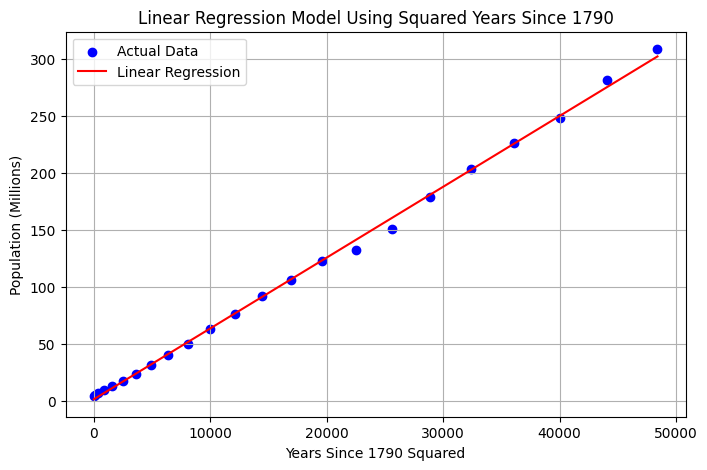

In [10]:
# 1.e - Run another linear regression, where your input feature is the square of the number of years since 
# 1790. Find and report the R2-value of this model. 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv(r"C:\Users\vampr\Desktop\US_Pop_Data.csv")

df["Years since 1790"] = df["year"] - 1790
df["Population in Million"] = df["us_pop"] / 1_000_000
df["Years_Since_1790_Squared"] = df["Years since 1790"] ** 2

# prep data
X_squared = df[["Years_Since_1790_Squared"]]  # squared years
y = df["Population in Million"]  # population in millions

model_squared = LinearRegression()
model_squared.fit(X_squared, y)

y_pred_squared = model_squared.predict(X_squared)

# Calculate R2 value
r2_squared = r2_score(y, y_pred_squared)
print(f"R² Value (Squared Years Model): {r2_squared:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_squared, y, color="blue", label="Actual Data")  # Scatter plot
plt.plot(X_squared, y_pred_squared, color="red", label="Linear Regression")  # Regression line
plt.xlabel("Years Since 1790 Squared")
plt.ylabel("Population (Millions)")
plt.title("Linear Regression Model Using Squared Years Since 1790")
plt.legend()
plt.grid(True)
plt.show()

R2 Value (Linear Model): 0.9192
R2 Value (Squared Model): 0.9985


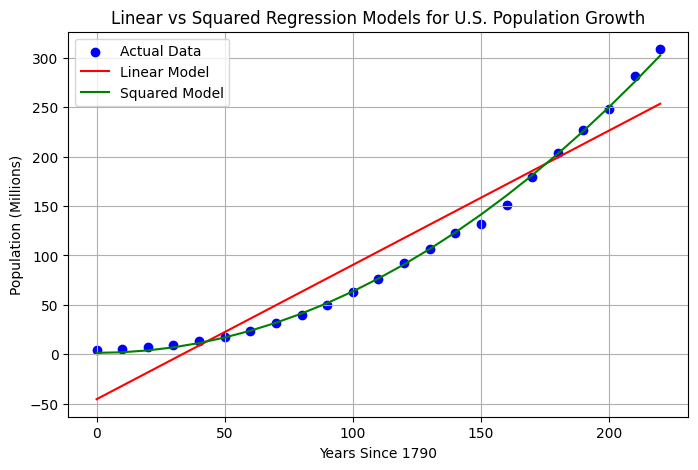

In [12]:
# 1.f - Plot the models you built on top of the data. Which one fits the data better? Is this apparent in 
# your R2-values. Explain. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv(r"C:\Users\vampr\Desktop\US_Pop_Data.csv")

df["Years since 1790"] = df["year"] - 1790
df["Population in Million"] = df["us_pop"] / 1_000_000
df["Years_Since_1790_Squared"] = df["Years since 1790"] ** 2

# prep
X_linear = df[["Years since 1790"]]  # Independent variable (years since 1790)
X_squared = df[["Years_Since_1790_Squared"]]  # Independent variable (squared years)
y = df["Population in Million"]  # Dependent variable (population in millions)

model_linear = LinearRegression()
model_linear.fit(X_linear, y)
y_pred_linear = model_linear.predict(X_linear)

model_squared = LinearRegression()
model_squared.fit(X_squared, y)
y_pred_squared = model_squared.predict(X_squared)

# R2 values
r2_linear = r2_score(y, y_pred_linear)
r2_squared = r2_score(y, y_pred_squared)

print(f"R2 Value (Linear Model): {r2_linear:.4f}")
print(f"R2 Value (Squared Model): {r2_squared:.4f}")

# Plot data
plt.figure(figsize=(8, 5))
plt.scatter(df["Years since 1790"], y, color="blue", label="Actual Data") 

# Plot linear regression model
plt.plot(df["Years since 1790"], y_pred_linear, color="red", label="Linear Model")

# Plot squared regression model
plt.plot(df["Years since 1790"], y_pred_squared, color="green", label="Squared Model")

# Add labels and title
plt.xlabel("Years Since 1790")
plt.ylabel("Population (Millions)")
plt.title("Linear vs Squared Regression Models for U.S. Population Growth")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Explain: The Squared Regression model is a better fit - it follows the data almost exactly, where as the linear model is just that, a linear model. 
# The line does have a positive correlation, so it isn't neccessarily a poor representation of the data, it just isn't as accurate as the squared model
# The R2 values also show how closely the Squared Model is correlated, being closer to 1 than the linear model. 